In [1]:
import pandas as pd
import nass
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
api = nass.NassApi('7B787C2D-2F3A-35F4-BEAC-CFBDA3E3ABC5 ')

In [6]:
q = api.query()
q.filter('commodity_desc','CORN').filter("statisticcat_desc","YIELD")
q.filter("state_alpha","CO")
q.filter("unit_desc","BU / ACRE")
q.filter('domain_desc','TOTAL')
q.filter('domaincat_desc','NOT SPECIFIED')
q.filter('agg_level_desc','STATE')
q.filter('reference_period_desc','YEAR')
q.filter('prodn_practice_desc','ALL PRODUCTION PRACTICES')

In [7]:
data_corn = q.execute()

In [8]:
corn_yielddata = pd.DataFrame(data = data_corn)
corn_value = map(float,list(corn_yielddata['Value']))
corn_value = [0]+ corn_value
corn_arr = np.asarray(corn_value)
corn_arr.sort(axis=0)

In [13]:
len(corn_arr)

139

In [9]:

q = api.query()
q.filter('commodity_desc','WHEAT')
q.filter("statisticcat_desc","YIELD")
q.filter("state_alpha","CO")
q.filter("unit_desc","BU / ACRE")
q.filter('domain_desc','TOTAL')
q.filter('domaincat_desc','NOT SPECIFIED')
q.filter('agg_level_desc','STATE')
q.filter('reference_period_desc','YEAR')
q.filter('prodn_practice_desc','ALL PRODUCTION PRACTICES')
q.filter('class_desc','ALL CLASSES')

data_wheat = q.execute()

In [35]:
wheat_yielddata = pd.DataFrame(data = data_wheat)
wheat_value = map(float,list(wheat_yielddata['Value']))
wheat_value.append(160)
wheat_arr = np.asarray(wheat_value)
wheat_arr = wheat_arr[10:149]
wheat_arr.sort(axis=0)

In [36]:
len(wheat_arr)

139

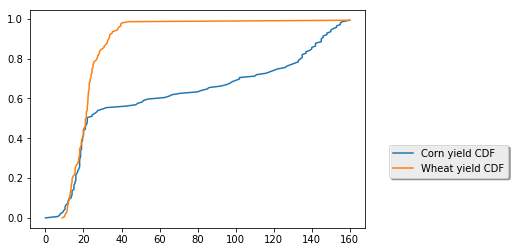

In [44]:
plt.plot(corn_arr, np.linspace(0, 1, len(corn_arr),endpoint=False), label='Corn yield CDF')
plt.plot(wheat_arr, np.linspace(0, 1, len(wheat_arr), endpoint=False), label='Wheat yield CDF')
plt.legend(bbox_to_anchor=(1, 0.0, 0.5, 0), loc=8, ncol=1, borderaxespad=5,shadow="true")

In [45]:
from scipy.integrate import simps
from numpy import trapz

In [47]:
area_corn_trapz = trapz(corn_arr,dx=5)
area_corn_simps= simps(corn_arr,dx=5)
area_wheat_trapz = trapz(wheat_arr,dx=5)
area_wheat_simps= simps(wheat_arr,dx=5)

print "area_corn_trapz = " + str(area_corn_trapz)
print "area_corn_simps = "+ str (area_corn_simps)
print "area_wheat_trapz = " + str (area_wheat_trapz)
print "area_wheat_simps = " + str (area_wheat_simps)

area_corn_trapz = 41927.5
area_corn_simps = 41926.3333333
area_wheat_trapz = 15178.5
area_wheat_simps = 15085.6666667
